In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('loan_data_2007_2014.csv', delimiter=',')

print("Jumlah baris dan kolom:", data.shape)
print(data.info())
print(data.isnull().sum())


/tmp/ipython-input-1475701399.py:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('loan_data_2007_2014.csv', delimiter=',')


Jumlah baris dan kolom: (466285, 75)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length           

In [3]:
total_rows = len(data)

# hitung jumlah missing per kolom
missing_summary = data.isnull().sum().reset_index()
missing_summary.columns = ["column", "missing_count"]
missing_summary["missing_pct"] = (missing_summary["missing_count"] / total_rows) * 100

# 1. full missing
full_missing = missing_summary[missing_summary["missing_count"] == total_rows]

# 2. sebagian besar missing (>30%)
mostly_missing = missing_summary[
    (missing_summary["missing_count"] > 0) &
    (missing_summary["missing_pct"] > 30) &
    (missing_summary["missing_count"] < total_rows)
]

# 3. sedikit missing (<=30%)
slightly_missing = missing_summary[
    (missing_summary["missing_count"] > 0) &
    (missing_summary["missing_pct"] <= 30)
]

print("=== Kolom Full Missing ===")
print(full_missing)

print("\n=== Kolom Sebagian Besar Missing (>30%) ===")
print(mostly_missing)

print("\n=== Kolom Sedikit Missing (<=30%) ===")
print(slightly_missing)


=== Kolom Full Missing ===
                       column  missing_count  missing_pct
54           annual_inc_joint         466285        100.0
55                  dti_joint         466285        100.0
56  verification_status_joint         466285        100.0
60                open_acc_6m         466285        100.0
61                 open_il_6m         466285        100.0
62                open_il_12m         466285        100.0
63                open_il_24m         466285        100.0
64         mths_since_rcnt_il         466285        100.0
65               total_bal_il         466285        100.0
66                    il_util         466285        100.0
67                open_rv_12m         466285        100.0
68                open_rv_24m         466285        100.0
69                 max_bal_bc         466285        100.0
70                   all_util         466285        100.0
72                     inq_fi         466285        100.0
73                total_cu_tl         466285 

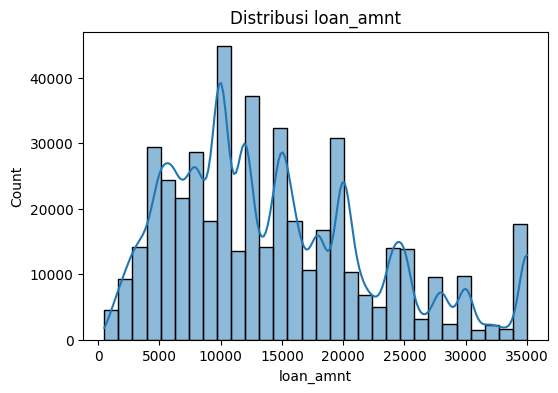

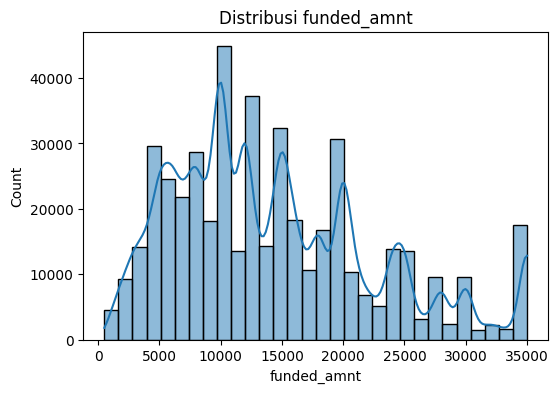

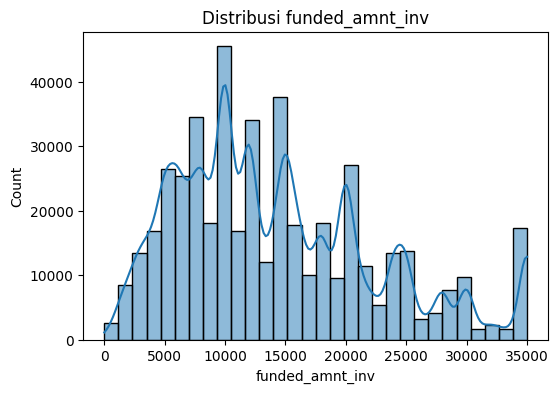

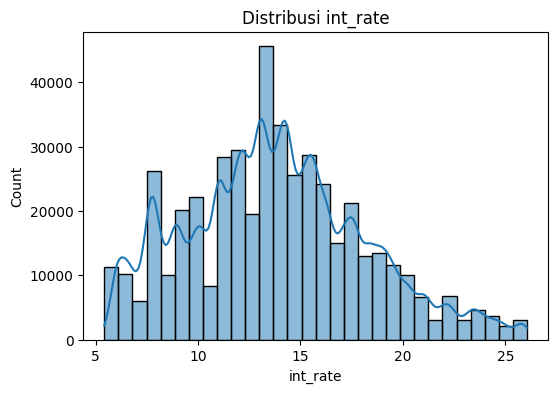

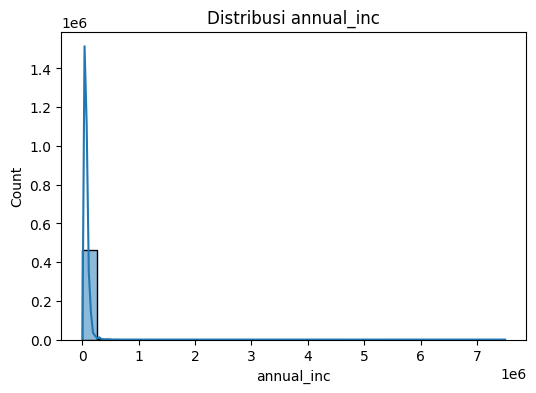

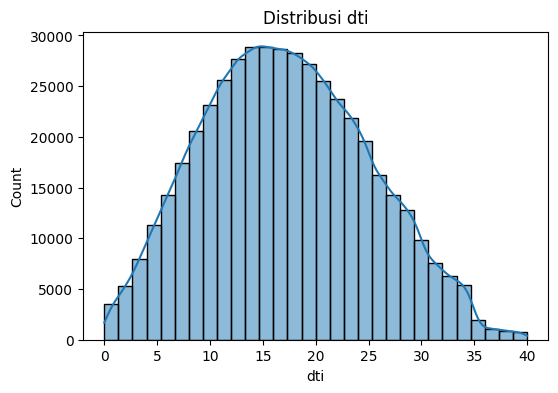

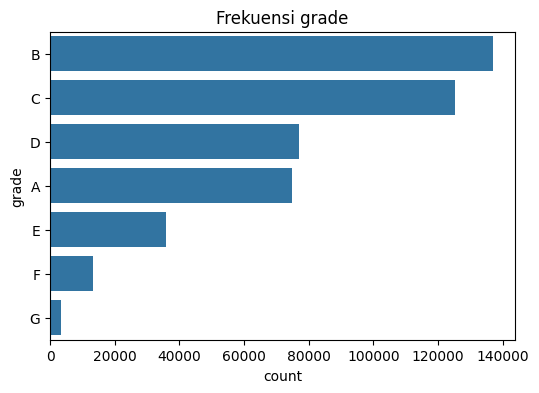

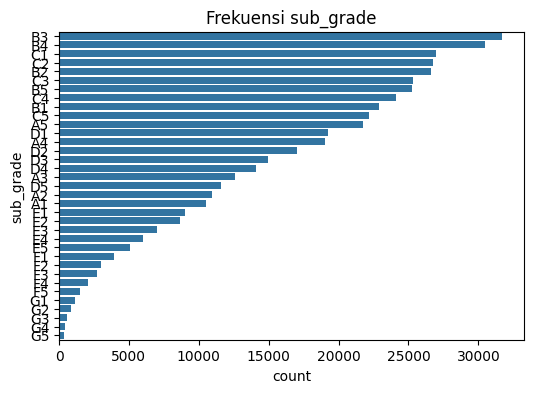

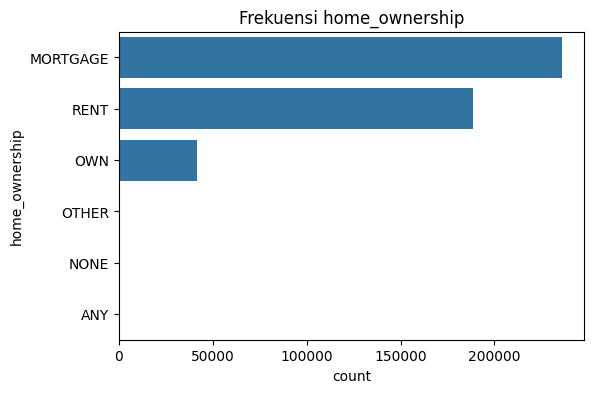

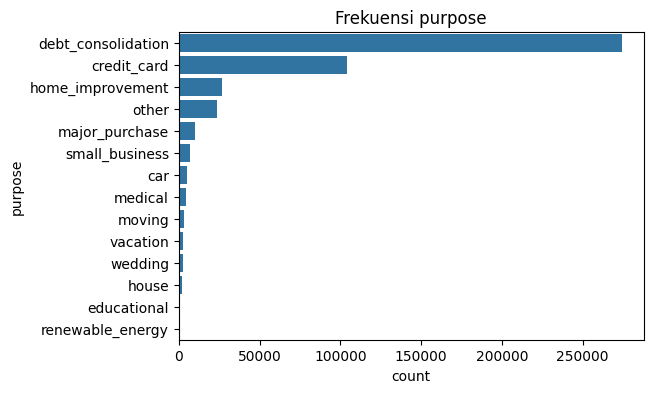

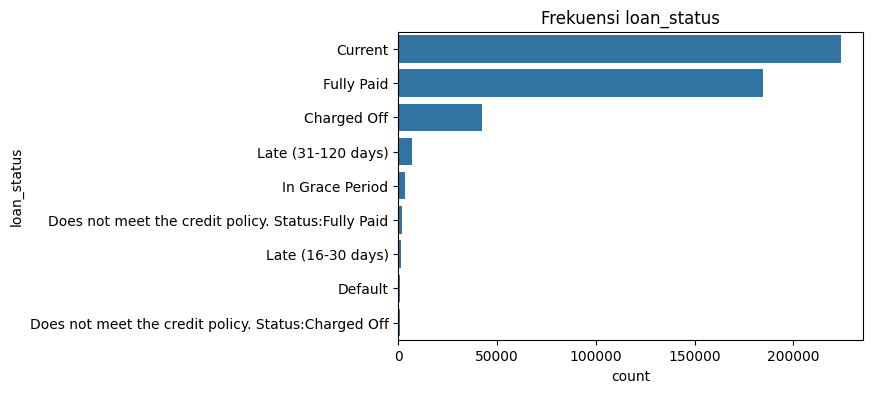

In [4]:
# Distribusi Variabel
# Histogram untuk variabel numerik penting
num_cols = ["loan_amnt", "funded_amnt", "funded_amnt_inv", "int_rate", "annual_inc", "dti"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribusi {col}")
    plt.show()

# Frekuensi untuk variabel kategorikal
cat_cols = ["grade", "sub_grade", "home_ownership", "purpose", "loan_status"]

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=col, data=data, order=data[col].value_counts().index)
    plt.title(f"Frekuensi {col}")
    plt.show()


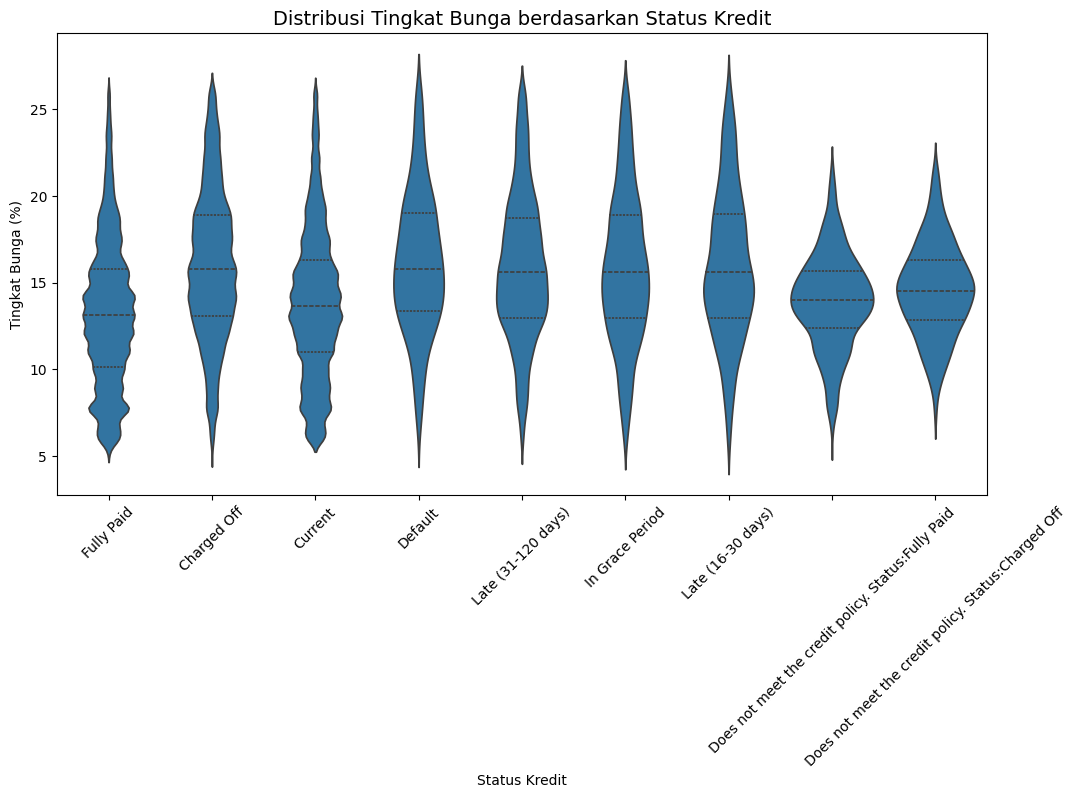

In [5]:
# violin plot hubungan interest rate dengan status kredit
plt.figure(figsize=(12,6))
sns.violinplot(x="loan_status", y="int_rate", data=data, inner="quartile")

plt.title("Distribusi Tingkat Bunga berdasarkan Status Kredit", fontsize=14)
plt.xlabel("Status Kredit")
plt.ylabel("Tingkat Bunga (%)")
plt.xticks(rotation=45)
plt.show()

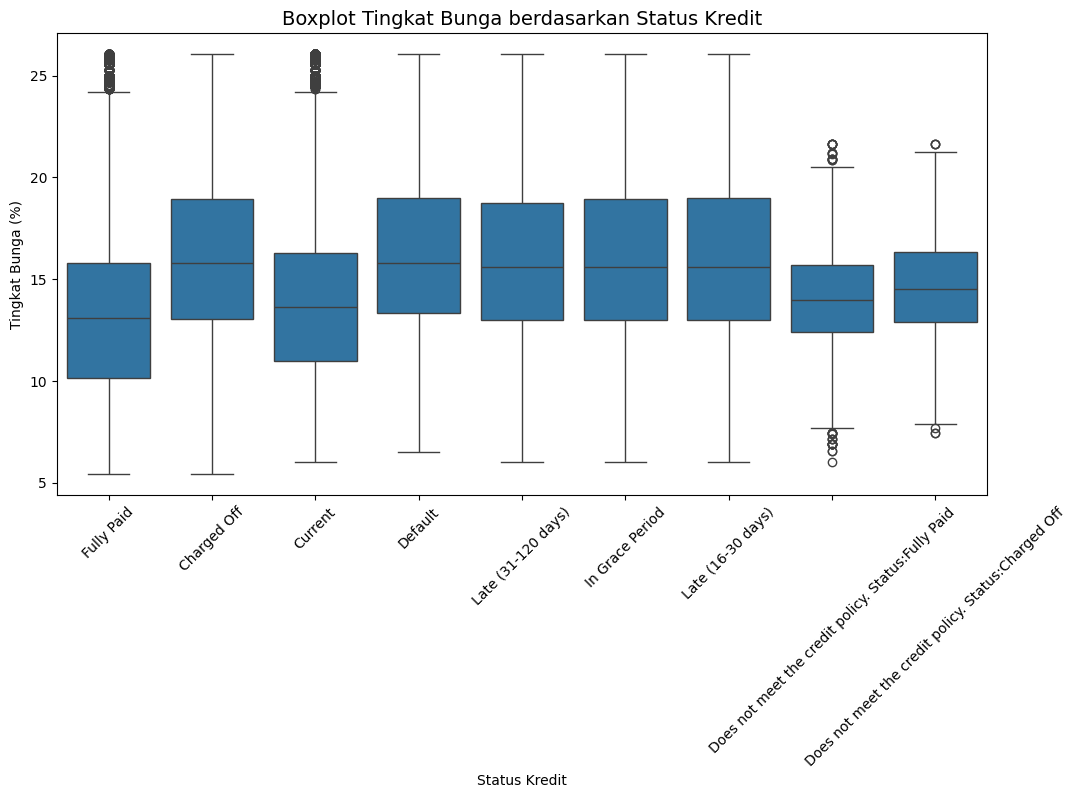

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="loan_status", y="int_rate", data=data)

plt.title("Boxplot Tingkat Bunga berdasarkan Status Kredit", fontsize=14)
plt.xlabel("Status Kredit")
plt.ylabel("Tingkat Bunga (%)")
plt.xticks(rotation=45)
plt.show()

In [6]:
print(data.describe())

for col in cat_cols:
    print(f"{col}:\n", data[col].value_counts().head(), "\n")


          Unnamed: 0            id     member_id      loan_amnt  \
count  466285.000000  4.662850e+05  4.662850e+05  466285.000000   
mean   233142.000000  1.307973e+07  1.459766e+07   14317.277577   
std    134605.029472  1.089371e+07  1.168237e+07    8286.509164   
min         0.000000  5.473400e+04  7.047300e+04     500.000000   
25%    116571.000000  3.639987e+06  4.379705e+06    8000.000000   
50%    233142.000000  1.010790e+07  1.194108e+07   12000.000000   
75%    349713.000000  2.073121e+07  2.300154e+07   20000.000000   
max    466284.000000  3.809811e+07  4.086083e+07   35000.000000   

         funded_amnt  funded_amnt_inv       int_rate    installment  \
count  466285.000000    466285.000000  466285.000000  466285.000000   
mean    14291.801044     14222.329888      13.829236     432.061201   
std      8274.371300      8297.637788       4.357587     243.485550   
min       500.000000         0.000000       5.420000      15.670000   
25%      8000.000000      8000.000000    

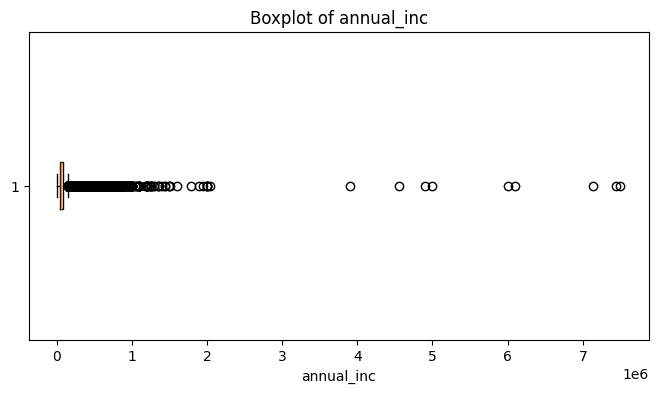

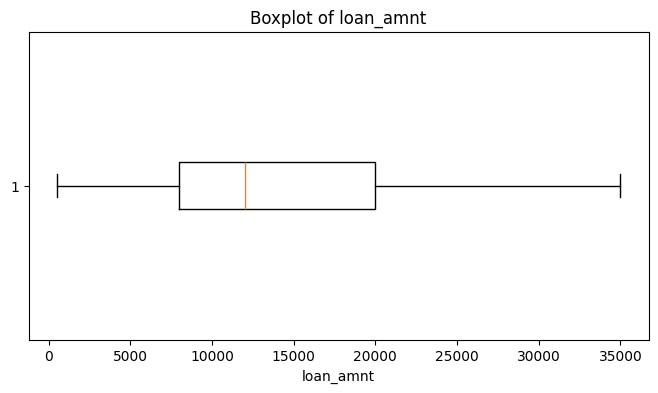

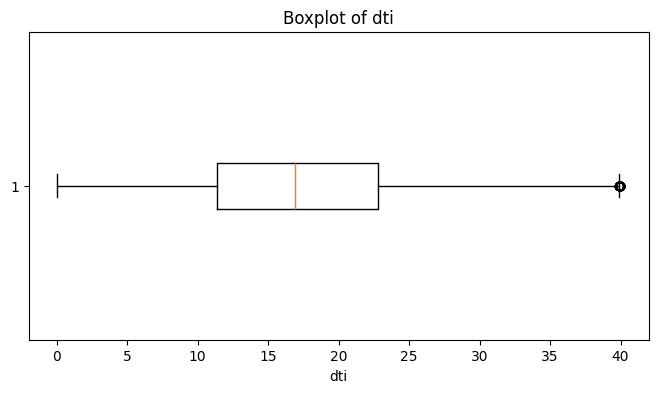

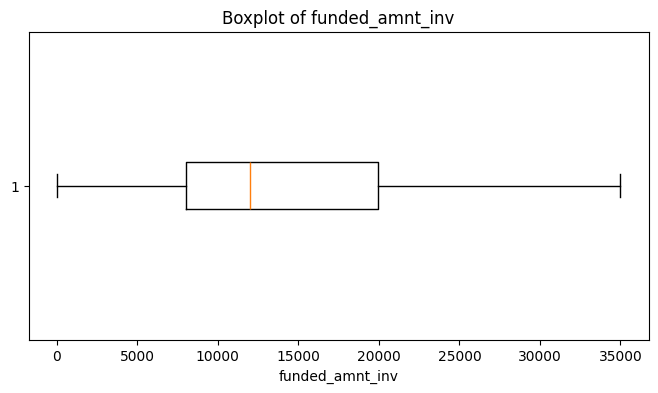

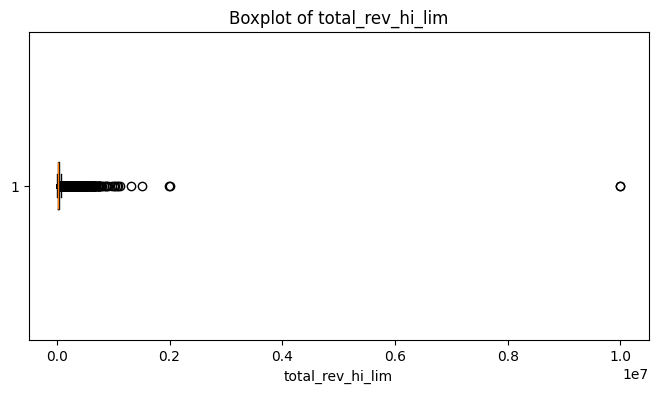

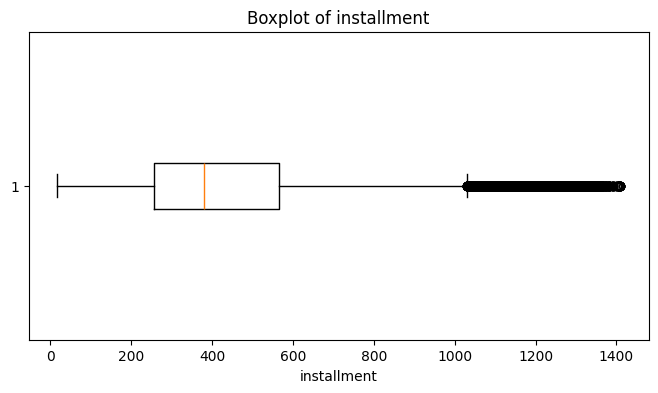

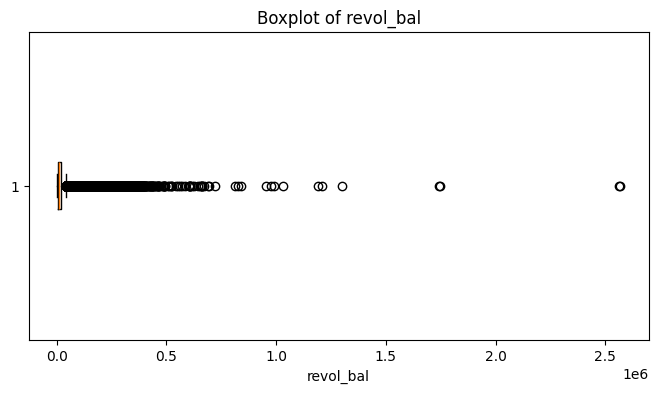

In [7]:
cols_to_check = ["annual_inc", "loan_amnt", "dti", "funded_amnt_inv","total_rev_hi_lim", "installment", "revol_bal"]

# Looping boxplot
for col in cols_to_check:
    plt.figure(figsize=(8,4))
    plt.boxplot(data[col].dropna(), vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

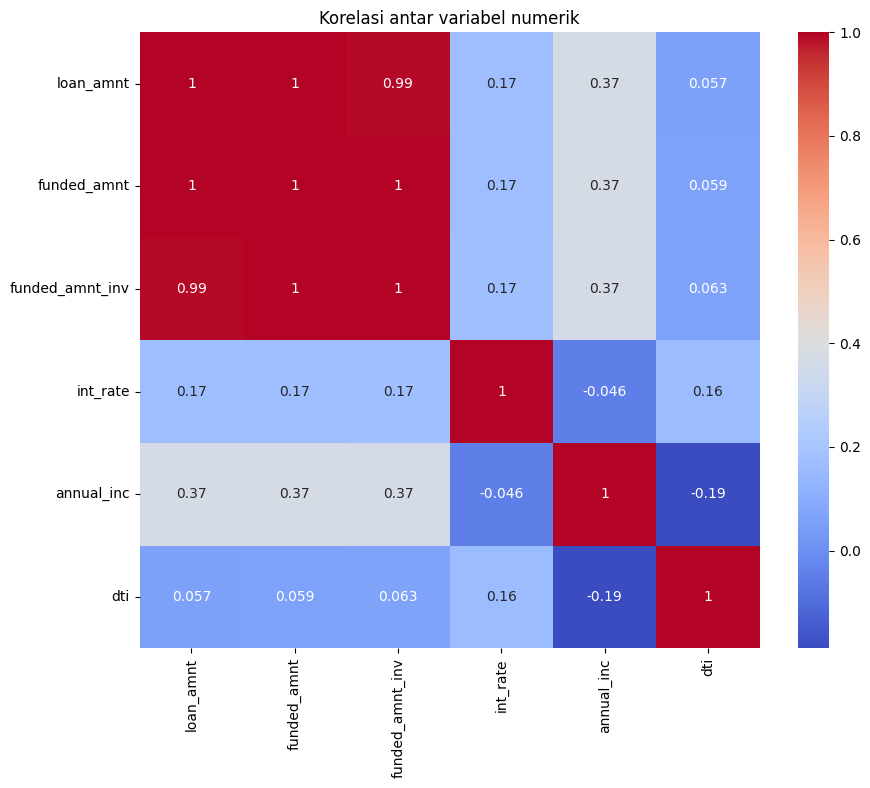

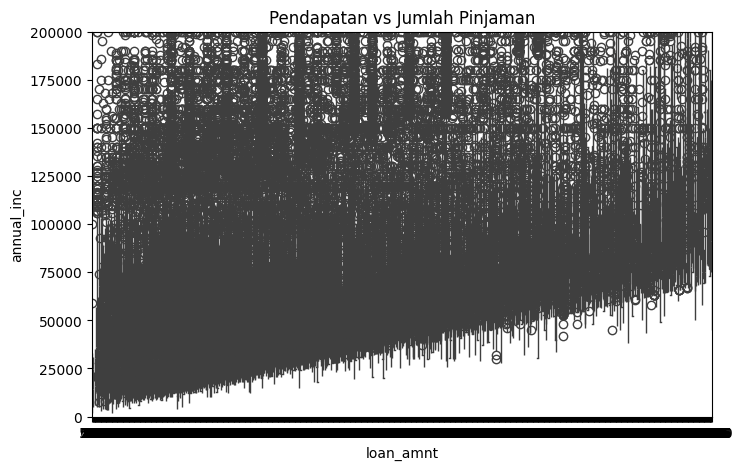

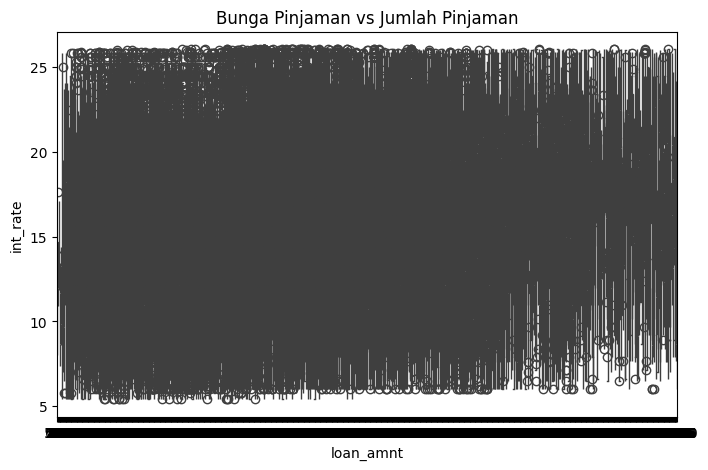

In [8]:
# Korelasi numerik
plt.figure(figsize=(10,8))
sns.heatmap(data[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi antar variabel numerik")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="loan_amnt", y="annual_inc", data=data)
plt.ylim(0, 200000)
plt.title("Pendapatan vs Jumlah Pinjaman")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="loan_amnt", y="int_rate", data=data)
plt.title("Bunga Pinjaman vs Jumlah Pinjaman")
plt.show()

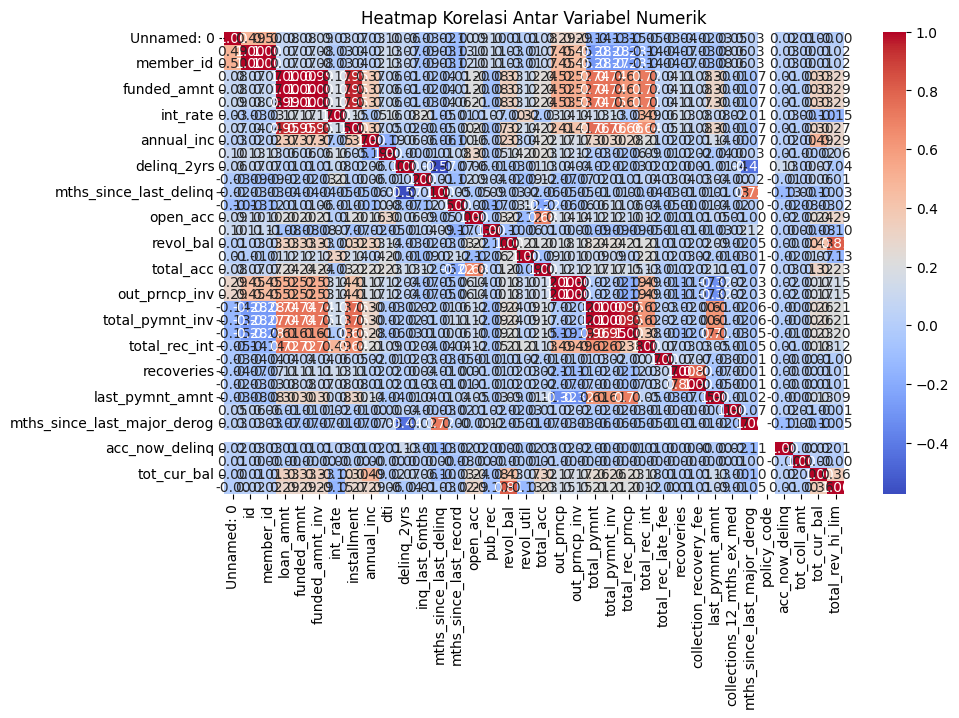

In [ ]:
# pilih hanya kolom numerik
num_df = data.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

In [ ]:
print(data.duplicated().sum())

print(data[data.duplicated()])

print(data.duplicated(subset=['id']).sum())

print(data.duplicated(subset=['member_id', 'loan_amnt']).sum())

0
Empty DataFrame
Columns: [Unnamed: 0, id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc,